# 2.Exploratory Data Analysis with Pandas Python

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Setting the plotting style
plt.style.use('ggplot')

# Adjusting the display option for maximum columns in pandas DataFrame
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("/kaggle/input/rollercoaster-database/coaster_db.csv")
df.head(1)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.574,-73.978,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9


# Step 1: Data Understanding

* `DataFrame shape`
* `DataFrame head()`
* `DataFrame tail()`
* `DataFrame dtypes`
* `DataFrame describe()`

In [3]:
# Display the shape of the DataFrame (number of rows and columns)
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (1087, 56)


In [4]:
# Display the column names of the DataFrame
print("Column names:\n", df.columns)

Column names:
 Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')


In [5]:
# Display the data types of each column in the DataFrame
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               

In [6]:
# Generate descriptive statistics of the DataFrame, including count, mean, std, min, max, etc.
print("Descriptive statistics:\n")
df.describe()

Descriptive statistics:



,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2: Data Prepration

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [7]:
# Example for dropping columns 
# df.drop(columns=['column name'], axis=1)

# Selecting specific columns and creating a new DataFrame
df = df[['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced', 
         'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph', 
         'height_ft', 'Inversions_clean', 'Gforce_clean']]

# Displaying the shape of the DataFrame
print(df.shape)

(1087, 13)


In [8]:
# Converting 'opening_date_clean' column to datetime
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [9]:
# Converting 'year_introduced' column to numeric
df['year_introduced'] = pd.to_numeric(df['year_introduced'])

In [10]:
# Displaying the data types of columns in the DataFrame
print(df.dtypes)

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object


## Rename Columns

In [11]:
# Renaming all columns using a dictionary
df.rename(columns={
    'coaster_name': 'Coaster_Name',
    'Location': 'Location',
    'Status': 'Status',
    'Manufacturer': 'Manufacturer',
    'year_introduced': 'Year_Introduced',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'Type_Main': 'Type_Main',
    'opening_date_clean': 'Opening_Date',
    'speed_mph': 'Speed_MPH',
    'height_ft': 'Height_FT',
    'Inversions_clean': 'Inversions',
    'Gforce_clean': 'Gforce'
}, inplace=True)

# Displaying the modified DataFrame
df


,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [12]:
# Count the number of missing values in each column
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_MPH          150
Height_FT          916
Inversions           0
Gforce             725
dtype: int64

In [13]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(1087, 13)

In [14]:
# Count the number of missing values again
df.isna().sum()


Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_MPH          150
Height_FT          916
Inversions           0
Gforce             725
dtype: int64

In [15]:
# Count the number of duplicated rows
df.duplicated().sum()


0

In [16]:
# Display the first few duplicated rows based on the 'Coaster_Name' column
df.loc[df.duplicated(subset=['Coaster_Name'])].head()


,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [17]:
# Check an example duplicate entry for 'Crystal Beach Cyclone'
df.query('Coaster_Name == "Crystal Beach Cyclone"')


,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [18]:
# Remove duplicates based on specific columns and reset the index
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])] \
       .reset_index(drop=True).copy()

In [19]:
# Display the new shape of the DataFrame after removing duplicates
df.shape

(990, 13)

# Step 3: Feature Understanding
(Univariate analysis)

* Plotting Feature Distributions
    1. Histogram
    2. KDE
    3. Boxplot

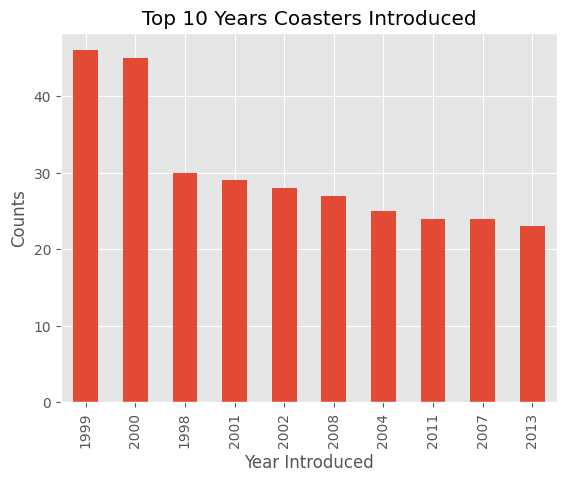

In [20]:
# Count the frequency of coasters introduced each year and plot the top 10
df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Coasters Introduced')
plt.xlabel("Year Introduced")
plt.ylabel("Counts")
plt.show()

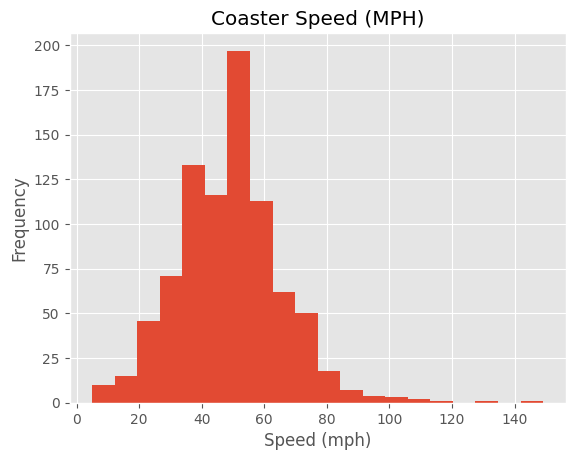

In [21]:
# Plot the distribution of coaster speeds using a histogram
ax = df['Speed_MPH'].plot(kind='hist', bins=20, title='Coaster Speed (MPH)')
ax.set_xlabel("Speed (mph)")
ax.set_ylabel("Frequency")
plt.show()

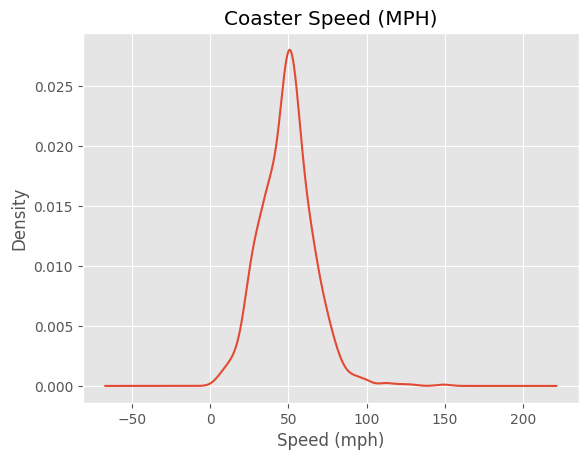

In [22]:
# Plot the density distribution of coaster speeds using a kernel density estimation plot
ax = df['Speed_MPH'].plot(kind='kde', title='Coaster Speed (MPH)')
ax.set_xlabel("Speed (mph)")
ax.set_ylabel("Density")
plt.show()


# Step 4: Feature Relationships

* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

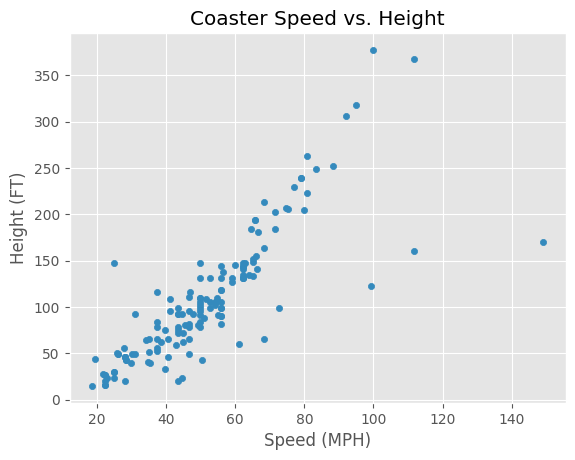

In [23]:
# Scatter plot of coaster speed (MPH) versus height (FT)
df.plot(kind='scatter', x='Speed_MPH', y='Height_FT', title='Coaster Speed vs. Height')
plt.xlabel("Speed (MPH)")
plt.ylabel("Height (FT)")
plt.show()

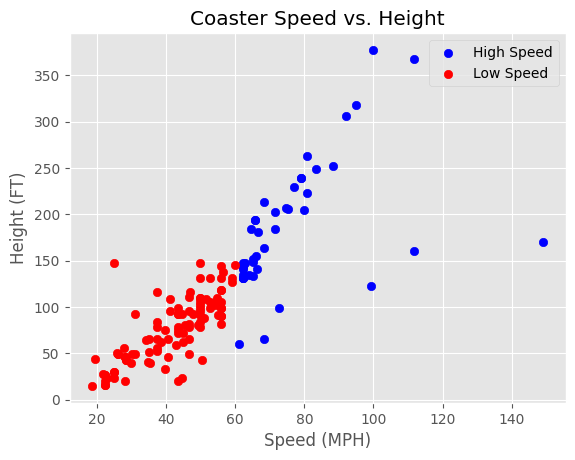

In [24]:
# Separate data based on a condition or category
df_high_speed = df[df['Speed_MPH'] > 60]
df_low_speed = df[df['Speed_MPH'] <= 60]

# Plotting with different colors
plt.scatter(df_high_speed['Speed_MPH'], df_high_speed['Height_FT'], color='blue', label='High Speed')
plt.scatter(df_low_speed['Speed_MPH'], df_low_speed['Height_FT'], color='red', label='Low Speed')

# Adding labels and title
plt.title('Coaster Speed vs. Height')
plt.xlabel('Speed (MPH)')
plt.ylabel('Height (FT)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


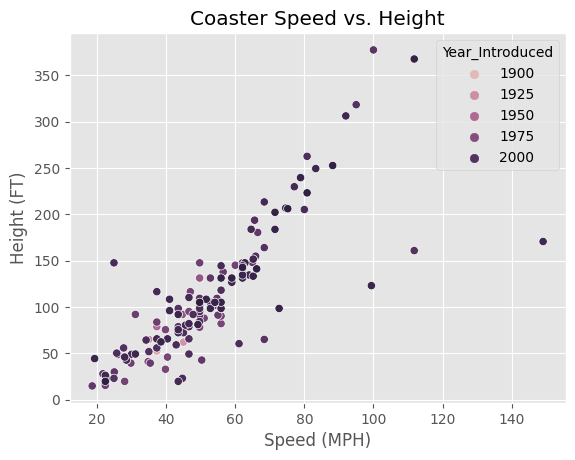

In [25]:
import seaborn as sns

# Plot scatterplot with Seaborn
sns.scatterplot(x='Speed_MPH', y='Height_FT', hue='Year_Introduced', data=df)

# Adding labels and title
plt.title('Coaster Speed vs. Height')
plt.xlabel('Speed (MPH)')
plt.ylabel('Height (FT)')

# Show plot
plt.show()


In [26]:
df.head(1)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

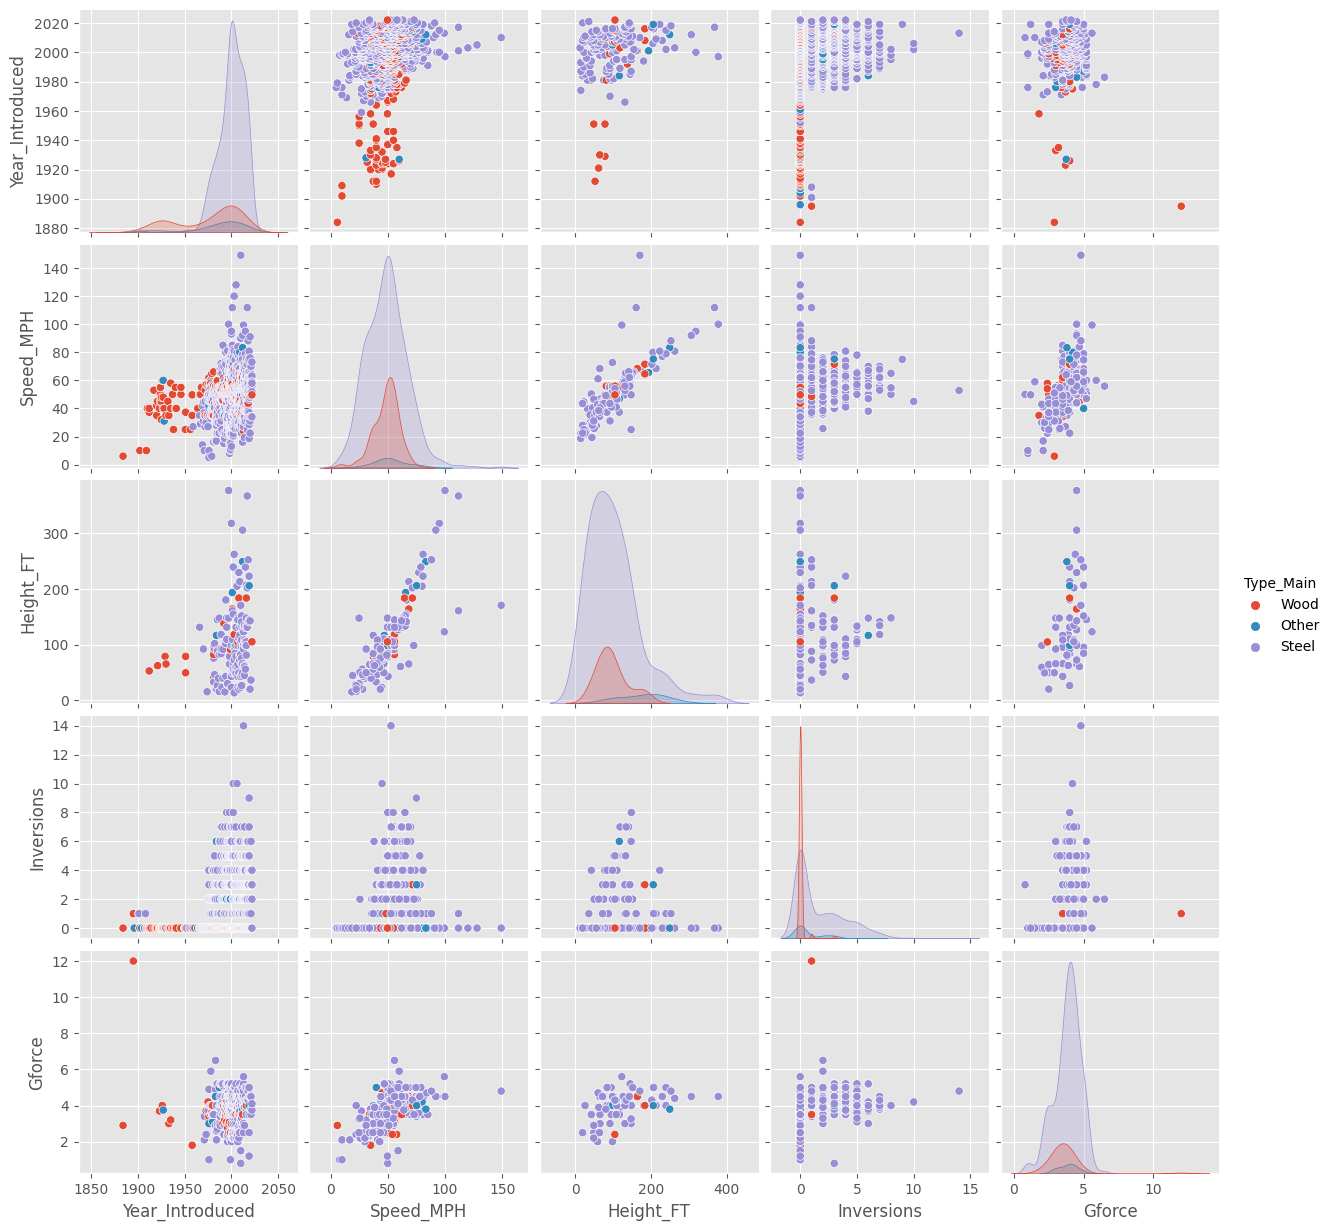

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na is deprecated")
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like")

# Selecting variables for pairplot
vars_to_plot = ['Year_Introduced', 'Speed_MPH', 'Height_FT', 'Inversions', 'Gforce']

# Creating pairplot
sns.pairplot(df, vars=vars_to_plot, hue='Type_Main')

# Displaying the plot
plt.show()


In [28]:
# Compute the correlation matrix after dropping rows with missing values
correlation_matrix = df[['Year_Introduced', 'Speed_MPH', 'Height_FT', 'Inversions', 'Gforce']].dropna().corr()
correlation_matrix

,Year_Introduced,Speed_MPH,Height_FT,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_MPH,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_FT,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


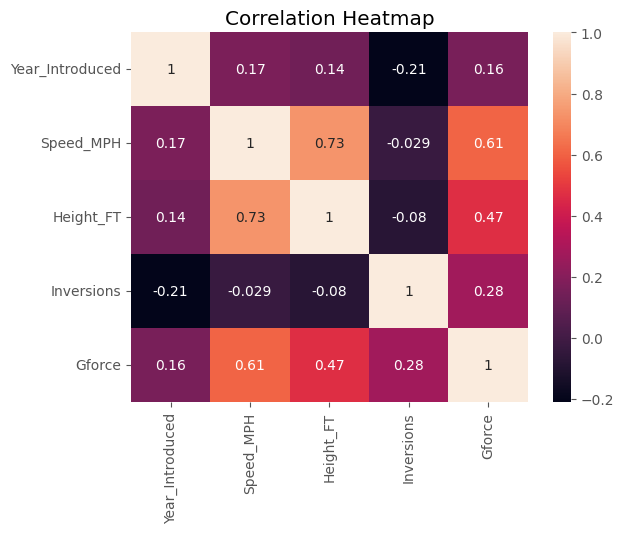

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True)

# Adding title
plt.title('Correlation Heatmap')

# Displaying the plot
plt.show()


# Step 5: Ask a Question about the Data

### Try to answer a question you have about the data using a plot or statistic.